In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import fetch_california_housing

In [21]:
df = fetch_california_housing()

In [24]:
dataset = pd.DataFrame(df.data)

In [25]:
dataset.columns = df.feature_names

In [26]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [27]:
## Independent features and dependent features
X = dataset
y = df.target

In [28]:
## TARIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [35]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [36]:
## Standardizing The Dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [42]:
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.13350629,  0.50935748,  0.18106017, ..., -0.01082519,
        -0.80568191,  0.78093406],
       [-0.53221805, -0.67987313, -0.42262953, ..., -0.08931585,
        -1.33947268,  1.24526986],
       [ 0.1709897 , -0.36274497,  0.07312833, ..., -0.04480037,
        -0.49664515, -0.27755183],
       ...,
       [-0.49478713,  0.58863952, -0.59156984, ...,  0.01720102,
        -0.75885816,  0.60119118],
       [ 0.96717102, -1.07628333,  0.39014889, ...,  0.00482125,
         0.90338501, -1.18625198],
       [-0.68320166,  1.85715216, -0.82965604, ..., -0.0816717 ,
         0.99235014, -1.41592345]])

In [39]:
X_test = scaler.transform(X_test)

In [43]:
# Can Find Inverse by this!
# scaler.inverse_transform(X_train)

In [46]:
from sklearn.linear_model import LinearRegression
##Cross Validation
from sklearn.model_selection import cross_val_score

In [56]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [50]:
mse = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error',cv=10)

In [58]:
np.mean(mse)

-0.5257104326777

In [57]:
#Prediction
reg_predict = regression.predict(X_test)

In [59]:
reg_predict

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

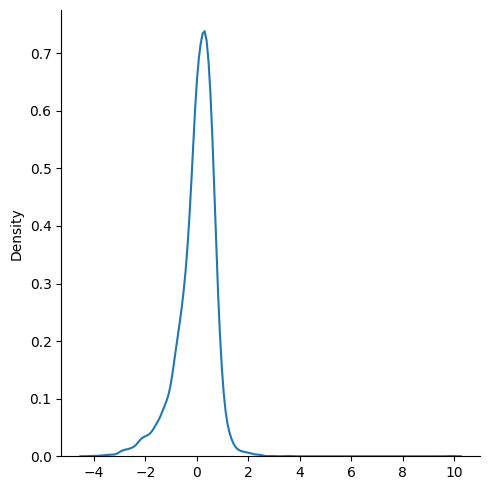

In [61]:
import seaborn as sns
sns.displot(reg_predict-y_test, kind='kde')

In [65]:
from sklearn.metrics import r2_score
score=r2_score(reg_predict,y_test)

In [66]:
score

0.34513393809439585